# 1. Import the necessary libraries

In [117]:
import math
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.weightstats import ztest
#Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 2. Read the data as a data frame

In [2]:
#Creating data frame of insurance data
patients_df = pd.read_csv('insurance.csv')

In [3]:
patients_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
patients_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# 3a. Shape of the data

Data frame has <b>1338 rows and 7 columns</b> of data

In [5]:
patients_df.shape

(1338, 7)

# 3b. Data type of each attribute

Total 4 quantitative with <b>2 discrete and 2 Continous value</b> attributes 
<b>3 categorical/Nominal</b> attributes

In [6]:
#Data type of each attribute
patients_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 3c. Checking the presence of missing values

All the attributes are having <b>same number of values (1338 count)</b>, No missing values

In [7]:
patients_df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [8]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3d 5 point summary of numerical attributes

Smallest (min)<br>
Q1 (25%)<br>
Q2(Median) (50%)<br>
Q3 (75%)<br>
Largest (max)

In [9]:
patients_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
patients_df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


# 3e Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
# 3f Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

### Age Skeness analysis

Mode - 18<br>
Mean - 39.2<br>
Median - 39<br>
Lowest(min) - 18<br>
Highest(Max) - 64<br>
Based on Mode, mean and median it can't be clearly classified as left or right skewed or symmetric

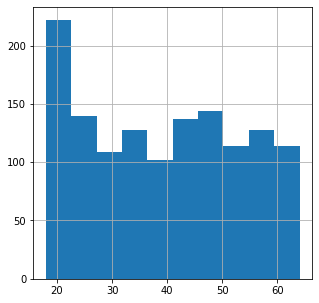

In [11]:
patients_df['age'].hist(figsize=(5,5))

### BMI Skeness analysis

Mode - 32.3<br>
Mean - 30.66<br>
Median - 30.4<br>
Lowest(min) - 15.96<br>
Highest(Max) - 53.13<br>
Based on Mode, mean and median it can be classified as right skewed distribution

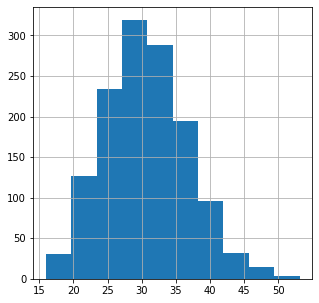

In [12]:
patients_df['bmi'].hist(figsize=(5,5))

### Charges Skeness analysis

Mode - 1639.56<br>
Mean - 13270.42<br>
Median - 9382.03<br>
Lowest(min) - 1121.87<br>
Highest(Max) - 63770.42<br>
Based on Mode, mean and median it can be classified as right skewed distribution

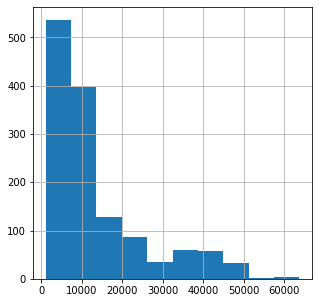

In [13]:
patients_df['charges'].hist(figsize=(5,5))

# 3g Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

### Age outliers
Age attribute values are well within the lower and upper bound, Same has been depicted in Boxplot

Age lower bound -  -9.0
Age upper bound -  87.0


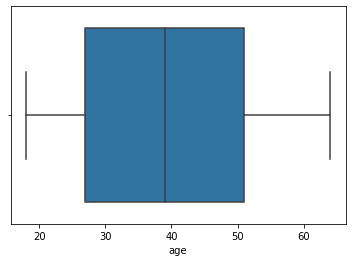

In [14]:
age_Q1=27
age_Q3=51
age_IQR=age_Q3-age_Q1
age_lower_bound=age_Q1-(1.5*age_IQR)
age_upper_bound=age_Q3+(1.5*age_IQR)
print("Age lower bound - ",age_lower_bound)
print("Age upper bound - ",age_upper_bound)
sns.boxplot(patients_df['age'])

### BMI outliers
There are no BMI values that are less than lower outlier but there are BMI values that are greater than upper outlier
Same has been depicted in boxplot

BMI lower bound -  13.7
BMI upper bound -  47.290000000000006


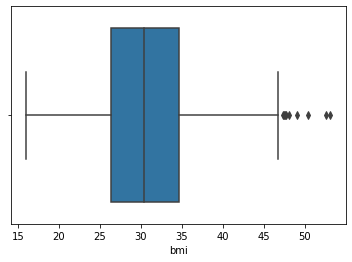

In [15]:
bmi_Q1=26.296250
bmi_Q3=34.693750
bmi_IQR=bmi_Q3-bmi_Q1
bmi_lower_bound=bmi_Q1-(1.5*bmi_IQR)
bmi_upper_bound=bmi_Q3+(1.5*bmi_IQR)
print("BMI lower bound - ",bmi_lower_bound)
print("BMI upper bound - ",bmi_upper_bound)
sns.boxplot(patients_df['bmi'])

### Charges outliers
There are no charges that are less than lower outlier but there are charges that are greater than upper outlier
Same has been depicted in boxplot

Charges lower bound -  -92850.95724999999
Charges upper bound -  157743.25915


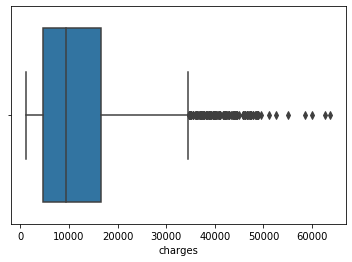

In [16]:
charges_Q1=1121.8739
charges_Q3=63770.4280
charges_IQR=charges_Q3-charges_Q1
charges_lower_bound=charges_Q1-(1.5*charges_IQR)
charges_upper_bound=charges_Q3+(1.5*charges_IQR)
print("Charges lower bound - ",charges_lower_bound)
print("Charges upper bound - ",charges_upper_bound)
sns.boxplot(patients_df['charges'])

# 3h. Distribution of categorical columns (include children)

In [17]:
patients_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<b>Children</b> values right skewed. Highest occurence <b>(Mode) is children count 0</b>

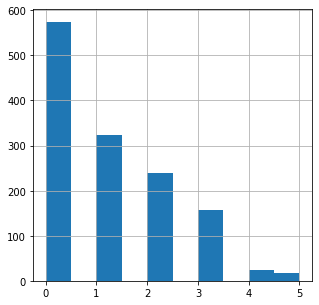

In [18]:
patients_df['children'].hist(figsize=(5,5))

<b>Sex</b> attribute has only 2 values with male and female values almost <b>equal distributed</b>

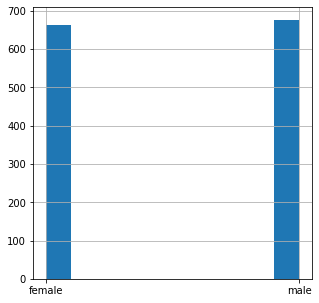

In [19]:
patients_df['sex'].hist(figsize=(5,5))

<b>Smoker</b> attribute has only 2 values, with <b>majority non-smokers</b>

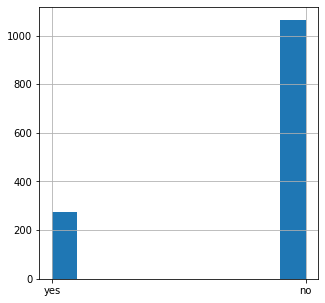

In [20]:
patients_df['smoker'].hist(figsize=(5,5))

All 4 values of <b>region</b> attribute are almost <b>equally distributed</b> with Southeast having highest occurences

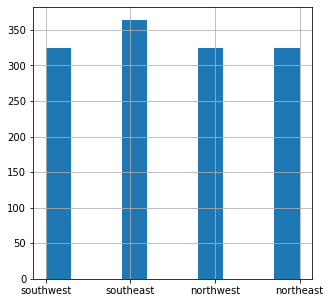

In [21]:
patients_df['region'].hist(figsize=(5,5))

# 3i. Pair plot that includes all the columns of the data frame

There is <b>no natural order for values of Sex, Smoker and Region</b> attributes <br>
So converting categorical attributes to <b>one-hot encoding</b> for values of attributes <b>Sex, Smoker and Region</b>

In [22]:
#Converting categorical values to one-hot encoding
onehot_encoded_data = pd.get_dummies(patients_df.select_dtypes(include="object"))
onehot_encoded_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [23]:
numerical_data = patients_df.select_dtypes(exclude="object")
numerical_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [24]:
insurance_data = pd.concat([onehot_encoded_data, numerical_data],axis=1)
insurance_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1,0,0,1,0,0,0,1,19,27.900,0,16884.92400
1,0,1,1,0,0,0,1,0,18,33.770,1,1725.55230
2,0,1,1,0,0,0,1,0,28,33.000,3,4449.46200
3,0,1,1,0,0,1,0,0,33,22.705,0,21984.47061
4,0,1,1,0,0,1,0,0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0,50,30.970,3,10600.54830
1334,1,0,1,0,1,0,0,0,18,31.920,0,2205.98080
1335,1,0,1,0,0,0,1,0,18,36.850,0,1629.83350
1336,1,0,1,0,0,0,0,1,21,25.800,0,2007.94500


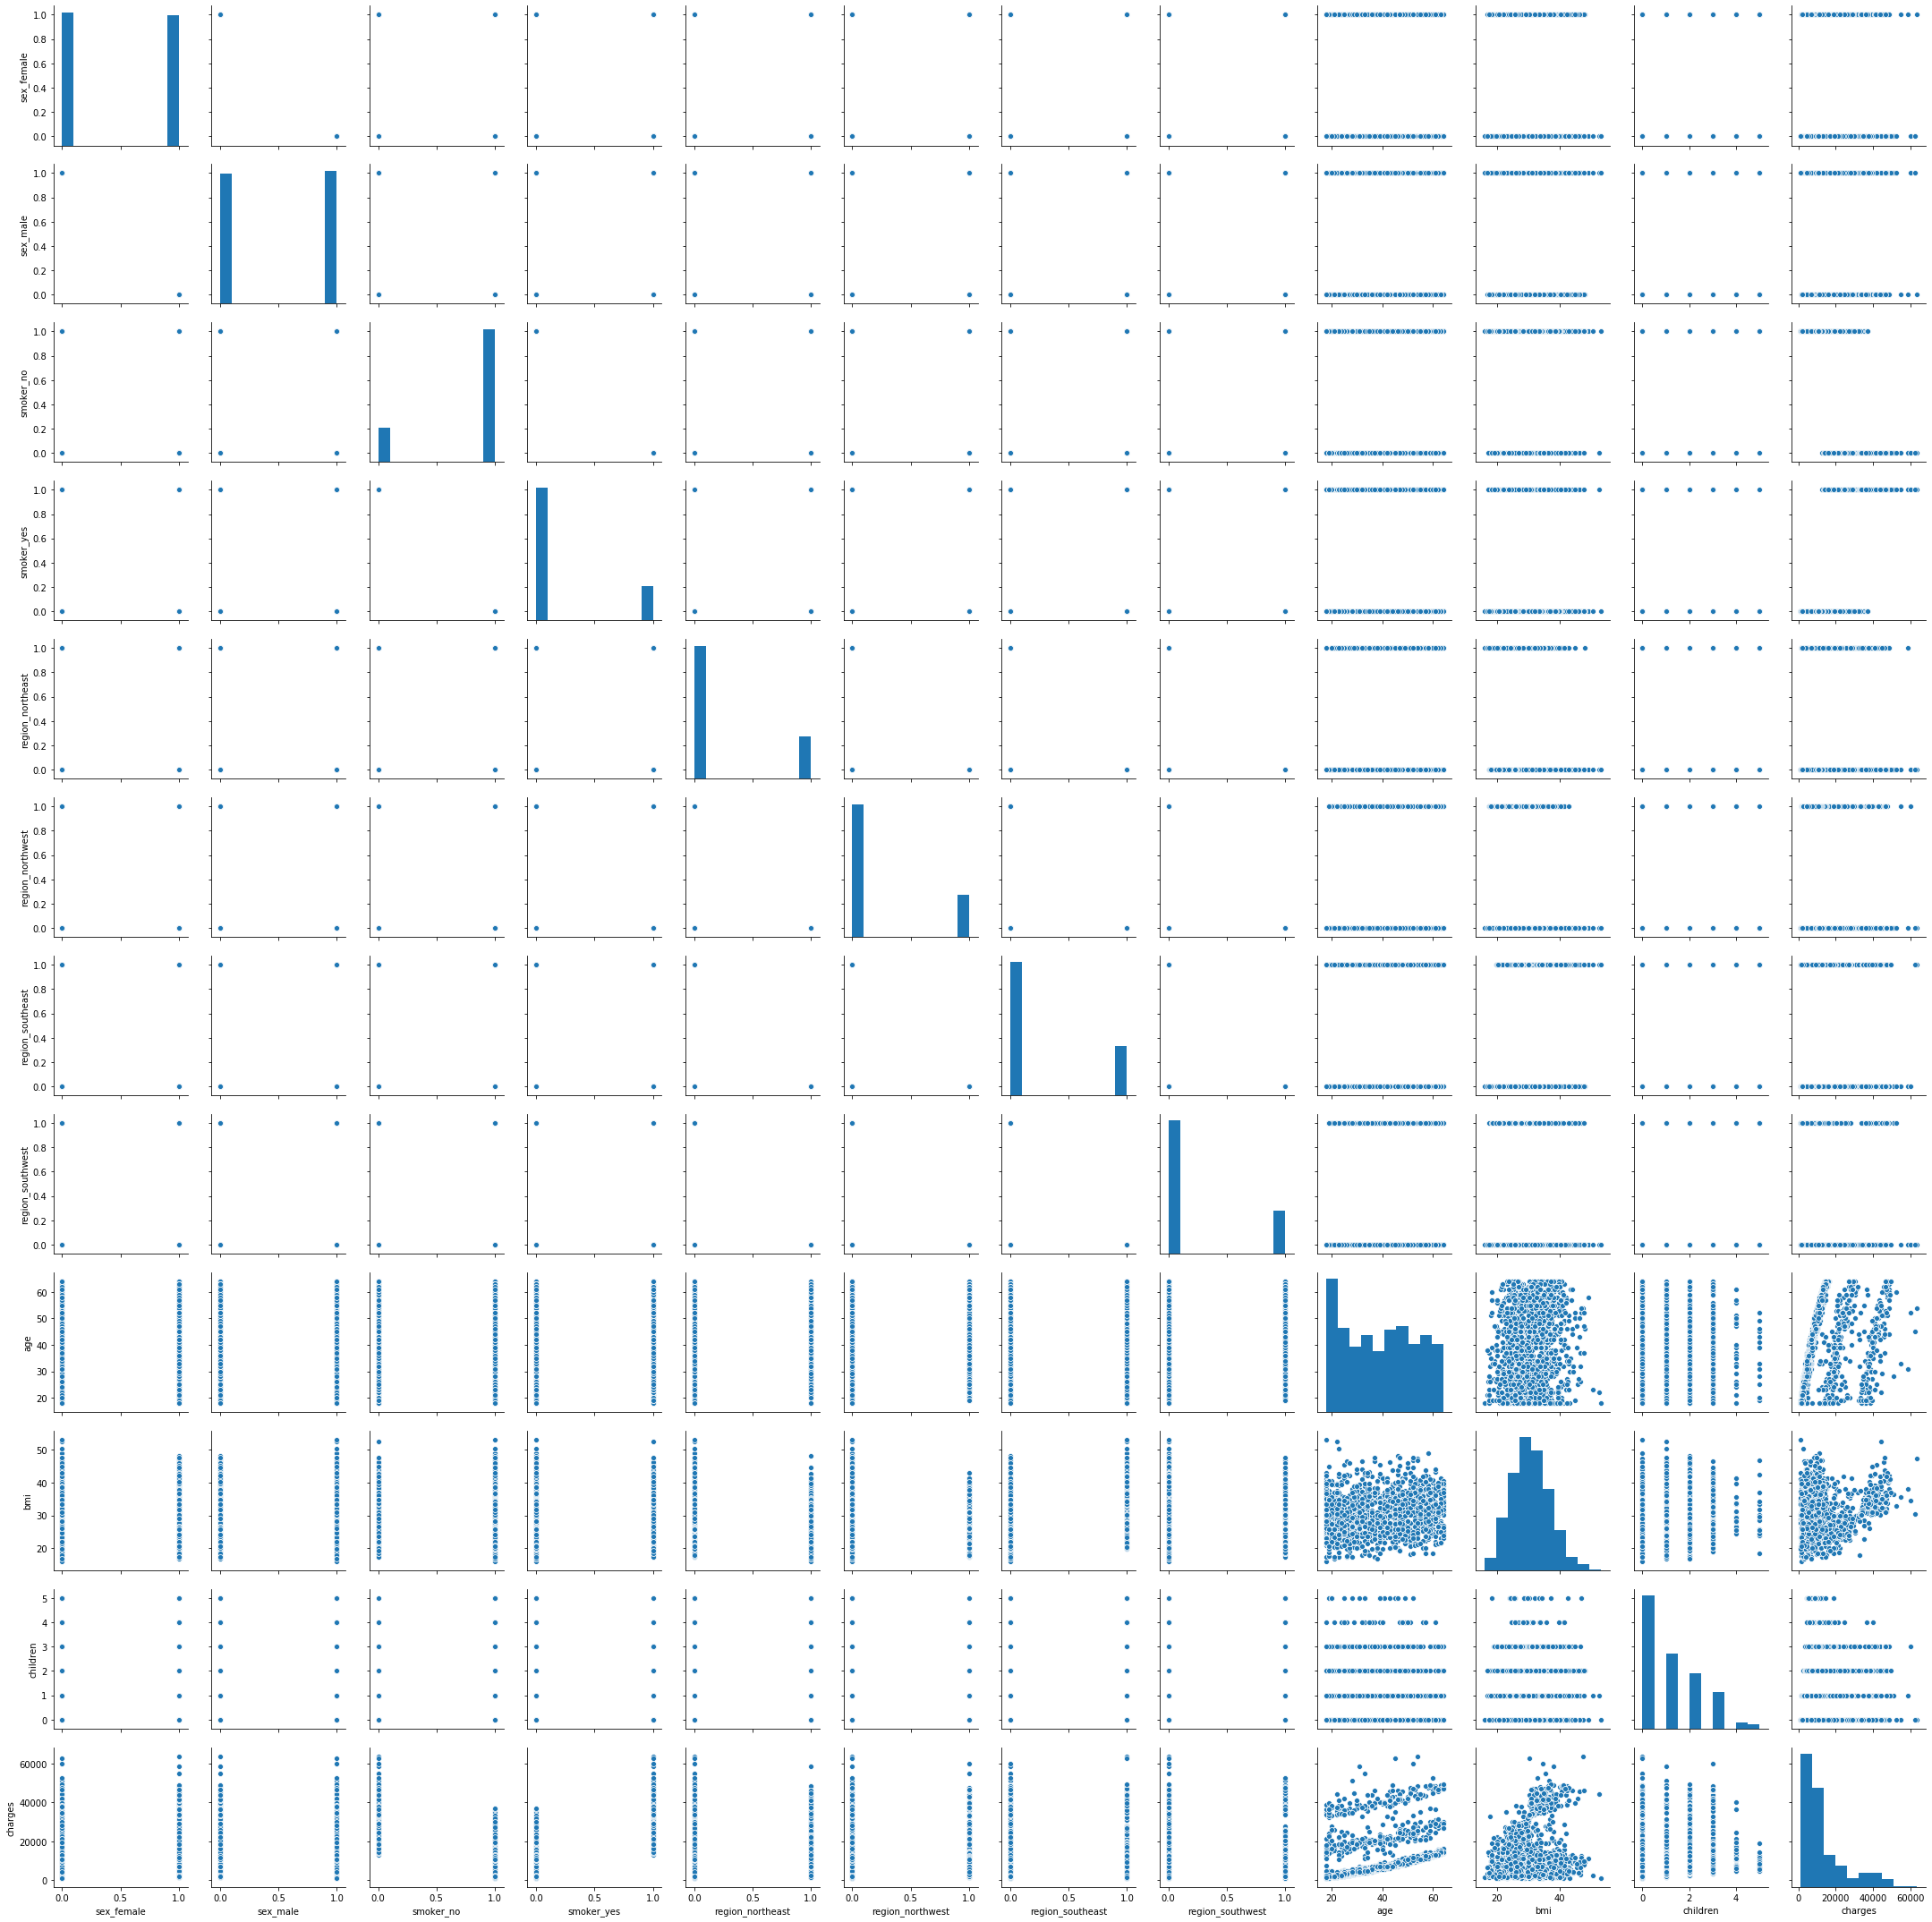

In [25]:
sns.pairplot(insurance_data)

# 4. Answer the following questions with statistical evidence

### 4a. Do charges of people who smoke differ significantly from the people who don't?
H0 - There is no significant difference between smoker and non-smoker charges<br>
Ha - There is significant difference between smoker and non-smoker charges <br>

<b>Using t-test indenpendent hypothesis test</b>

In [45]:
#Get Charges of smokers
smoker_charges = insurance_data[insurance_data['smoker_yes'] == 1]

#Get Charges of non-smokers
non_smoker_charges = insurance_data[insurance_data['smoker_yes'] != 1]

#use 2 sample test
charges_zstat, charges_pval = ttest_ind(smoker_charges['charges'], non_smoker_charges['charges'])
print("P Value - ", charges_pval)
print("Z Stat Value - ", charges_zstat)

#P-value compaision with 5% significance
if charges_pval < 0.05 :
    print("Reject NULL hypothesis with 5% significance, \nThere is significant difference between smokers and non smoker charges")
else:
    print("Failed to reject NULL hypothesis with 5% significance, \nThere is no significant difference between smokers and non-smokers charges")
    

P Value -  8.271435842177219e-283
Z Stat Value -  46.664921172723716
Reject NULL hypothesis with 5% significance, 
There is significant difference between smokers and non smoker charges


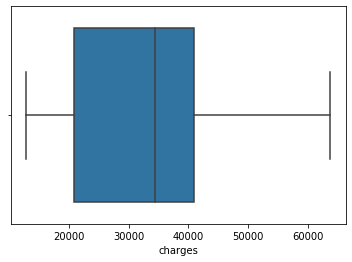

In [47]:
#No outliers
sns.boxplot(smoker_charges['charges'])

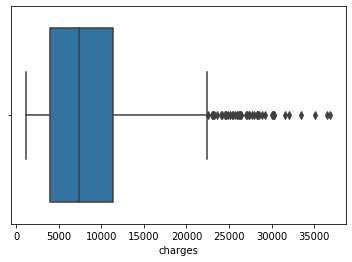

In [48]:
#Significant outliers are there
sns.boxplot(non_smoker_charges['charges'])

In [52]:
#Box plot indicates Upper outliers, checking p-value by removing outliers
non_smoker_charges['charges'].describe()
non_smoker_charges_Q1=3986.4387
non_smoker_charges_Q3=11362.8870
non_smoker_charges_IQR=non_smoker_charges_Q3-non_smoker_charges_Q1
non_smoker_charges_UPPER=non_smoker_charges_Q3+(1.5*non_smoker_charges_IQR)

#Considering charges that are within Upper bound
non_smoker_charges_without_outlier=non_smoker_charges[non_smoker_charges['charges'] <= non_smoker_charges_UPPER]
charges_no_outlier_zstat, charges_no_outlier_pval = ttest_ind(smoker_charges['charges'], non_smoker_charges_without_outlier['charges'])
print("P Value - ", charges_no_outlier_pval)
print("Z Stat Value - ", charges_no_outlier_zstat)
if charges_no_outlier_pval < 0.05 :
    print("Reject NULL hypothesis with 5% significance, \nThere is significant difference between smokers and non smoker charges")
else:
    print("Failed to reject NULL hypothesis with 5% significance, \nThere is no significant difference between smokers and non-smokers charges")
    

P Value -  0.0
Z Stat Value -  54.206424363873396
Reject NULL hypothesis with 5% significance, 
There is significant difference between smokers and non smoker charges


### 4b. Does bmi of males differ significantly from that of females?

H0 - No significant difference between males and females BMI<br>
Ha - There is significant difference between males and females BMI<br>

<b>Using t-test indenpendent hypothesis test</b>

In [127]:
#Select BMI of Males
males_insurance_data = insurance_data[insurance_data['sex_male'] == 1]
print("Male data shape", males_insurance_data.shape)

#Select BMI of females
females_insurance_data = insurance_data[insurance_data['sex_female'] == 1]
print("Female data shape", females_insurance_data.shape)
males_insurance_data['bmi'].describe()

Male data shape (676, 12)
Female data shape (662, 12)


count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

In [129]:
females_insurance_data['bmi'].describe()

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

In [87]:
#Find p-value between 2 samples
bmi_zstat, bmi_pval = ttest_ind(males_insurance_data['bmi'], females_insurance_data['bmi'], axis=0)

print("P Value - ", bmi_pval)
print("Z Stat Value - ", bmi_zstat)

#P-value compaision with 5% significance
if bmi_pval < 0.05 :
    print("Reject NULL hypothesis with 5% significance, \nThere is significant difference between males and females BMI")
else:
    print("Failed to reject NULL hypothesis with 5% significance, \nThere is no significant difference between males and females BMI")

Male data shape (676, 12)
Female data shape (662, 12)
P Value -  0.08997637178984932
Z Stat Value -  1.696752635752224
Failed to reject NULL hypothesis with 5% significance, 
There is no significant difference between males and females BMI


### 4c. Is the proportion of smokers significantly different in different genders?

H0 - There is no Significant difference between male and female smokers<br>
Ha - There is Significant difference between male and female smokers<br>

<b>Using z-test of proportion to test hypothesis</b>

In [124]:
males_data = insurance_data[insurance_data['sex_male'] == 1]
males_smokers_data = males_data[males_data['smoker_yes'] == 1]
females_data = insurance_data[insurance_data['sex_female'] == 1]
females_smokers_data = females_data[females_data['smoker_yes'] == 1]

#Total smokers count
sample_size = insurance_data.shape[0]
N0 = insurance_data[insurance_data['smoker_yes'] == 1].shape[0]
P0 = N0/sample_size

#Male Smokers count
N1 = males_smokers_data.shape[0]
P1 = N1/N0

#Female smokers count
N2 = females_smokers_data.shape[0]
P2 = N2/N0

print("Total smokers - ", N0)
print("Male smokers - ", N1)
print("Female smokers - ", N2)

smoker_pval = (1-stats.norm.cdf(Z))
smoker_zstat = (P1-P2)/(math.sqrt(P0*(1-P0)) * math.sqrt((1/N1 + 1/N2)))
print("Z stat - ", smoker_zstat, " P value - ", smoker_pval)

#P-value compaision with 5% significance
if smoker_pval < 0.05 :
    print("Reject NULL hypothesis with 5% significance, \nThere is significant difference between male and female smokers")
else:
    print("Failed to reject NULL hypothesis with 5% significance, \nThere is no significant difference between male and female smokers")

Total smokers -  274
Male smokers -  159
Female smokers -  115
Z stat -  3.2507556992912447  P value -  0.0005754935737884992
Reject NULL hypothesis with 5% significance, 
There is significant difference between male and female smokers


### 4d. Is the distribution of bmi across women with no children, one child and two children, the same ?

H0 - Distribution of BMI across women with no children, one child and two child are not same<br>
Ha - Distribution of BMI across women with no children, one child and two child are same<br>

<b>More than 2 samples has to compared, Using ANOVA to test hypothesis</b>

In [125]:
female_data = insurance_data[insurance_data['sex_female'] == 1]
no_chid_female_data = female_data[female_data['children'] == 0]
one_chid_female_data = female_data[female_data['children'] == 1]
two_chid_female_data = female_data[female_data['children'] == 2]

#Find p-value between 2 samples
female_bmi_zstat, female_bmi_pval = f_oneway(no_chid_female_data['bmi'], one_chid_female_data['bmi'], two_chid_female_data['bmi'])

print("P Value - ", female_bmi_pval)
print("Z Stat Value - ", female_bmi_zstat)

#P-value compaision with 5% significance
if female_bmi_pval < 0.05 :
    print("Reject NULL hypothesis with 5% significance, \nDistribution of BMI across women with no children, one child and two child are same")
else:
    print("Failed to reject NULL hypothesis with 5% significance, \nDistribution of BMI across women with no children, one child and two child are not same")

P Value -  0.7158579926754841
Z Stat Value -  0.3344720147757968
Failed to reject NULL hypothesis with 5% significance, 
Distribution of BMI across women with no children, one child and two child are not same
